In [1]:
import catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gst=pd.read_csv('../../GSTN_project/Train_60/Train_60/X_Train_Data_Input.csv')
gst_tar=pd.read_csv('../../GSTN_project/Train_60/Train_60/Y_Train_Data_Target.csv')
gst=pd.concat([gst,gst_tar],axis=1)
gst=gst.drop(columns=['ID'])
from sklearn.preprocessing import StandardScaler
gst=gst.drop(columns=['Column9'])
ss=StandardScaler()
gst[['Column1','Column2','Column14','Column15']]=ss.fit_transform(gst[['Column1','Column2','Column14','Column15']])
gst_clean=gst.dropna(subset='Column6')
gst_clean['Column0'].fillna(gst_clean['Column0'].median(),inplace=True)
cols=['Column3','Column4','Column5']
gst_clean[cols]=gst_clean[cols].fillna(gst_clean[cols].mean())
gst_clean['Column15']=gst_clean['Column15'].fillna(gst_clean['Column15'].mode()[0])
gst_clean['Column14']=gst_clean['Column14'].fillna(gst_clean['Column14'].mode()[0])
X_train=gst_clean.drop(columns=['target'])
y_train=gst_clean['target']
X_test=pd.read_csv('../../GSTN_project/Test_20/Test_20/X_Test_Data_Input.csv')
y_test=pd.read_csv('../../GSTN_project/Test_20/Test_20/Y_Test_Data_Target.csv')
X_test=X_test.drop(columns=['ID','Column9'])
test_gst=pd.concat([X_test,y_test],axis=1)
test_gst=test_gst.drop(columns=['ID'])
test_gst[['Column1','Column2','Column14','Column15']]=ss.transform(test_gst[['Column1','Column2','Column14','Column15']])
test_gst_clean=test_gst.dropna(subset='Column6')
test_gst_clean['Column0'].fillna(test_gst_clean['Column0'].median(),inplace=True)
cols=['Column3','Column4','Column5']
test_gst_clean[cols]=test_gst_clean[cols].fillna(test_gst_clean[cols].mean())

test_gst_clean['Column15']=test_gst_clean['Column15'].fillna(test_gst_clean['Column15'].mode()[0])
test_gst_clean['Column14']=test_gst_clean['Column14'].fillna(test_gst_clean['Column14'].mode()[0])
test_gst_clean.info()
X_test_gst=test_gst_clean.drop(columns=['target'])
y_test_gst=test_gst_clean['target']

C:\Users\aayuk\AppData\Local\Temp\ipykernel_24072\628977601.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gst_clean['Column0'].fillna(gst_clean['Column0'].median(),inplace=True)
C:\Users\aayuk\AppData\Local\Temp\ipykernel_24072\628977601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gst_clean['Column0'].fillna(gst_clean['Column0'

<class 'pandas.core.frame.DataFrame'>
Index: 260478 entries, 0 to 261711
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   260478 non-null  float64
 1   Column1   260478 non-null  float64
 2   Column2   260478 non-null  float64
 3   Column3   260478 non-null  float64
 4   Column4   260478 non-null  float64
 5   Column5   260478 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   260478 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column10  260478 non-null  int64  
 10  Column11  260478 non-null  int64  
 11  Column12  260478 non-null  int64  
 12  Column13  260478 non-null  int64  
 13  Column14  260478 non-null  float64
 14  Column15  260478 non-null  float64
 15  Column16  260478 non-null  float64
 16  Column17  260478 non-null  int64  
 17  Column18  260478 non-null  float64
 18  Column19  260478 non-null  int64  
 19  Column20  260478 non-null  int64  
 20  Column21 

C:\Users\aayuk\AppData\Local\Temp\ipykernel_24072\628977601.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_gst_clean['Column0'].fillna(test_gst_clean['Column0'].median(),inplace=True)
C:\Users\aayuk\AppData\Local\Temp\ipykernel_24072\628977601.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_gst_clean['Column0'].fillna(test

In [7]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [9]:
model = CatBoostClassifier(iterations=1150, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
model.fit(X_train, y_train)

0:	learn: 0.3456113	total: 207ms	remaining: 3m 57s
100:	learn: 0.0493422	total: 7.36s	remaining: 1m 16s
200:	learn: 0.0481385	total: 15.5s	remaining: 1m 13s
300:	learn: 0.0473871	total: 23s	remaining: 1m 4s
400:	learn: 0.0468466	total: 30.4s	remaining: 56.9s
500:	learn: 0.0463587	total: 37.7s	remaining: 48.8s
600:	learn: 0.0459075	total: 45s	remaining: 41.1s
700:	learn: 0.0454770	total: 52.5s	remaining: 33.6s
800:	learn: 0.0451124	total: 59.9s	remaining: 26.1s
900:	learn: 0.0447552	total: 1m 7s	remaining: 18.6s
1000:	learn: 0.0444197	total: 1m 14s	remaining: 11.2s
1100:	learn: 0.0440935	total: 1m 23s	remaining: 3.71s
1149:	learn: 0.0439387	total: 1m 27s	remaining: 0us


In [11]:
y_pred_gst=model.predict(X_test_gst)

In [13]:
accuracy_score(y_test_gst,y_pred_gst)

0.9789272030651341

In [25]:
print(len(y_test))
print(len(y_pred_gst))

261712
260478


In [29]:
len(X_test_gst)

260478

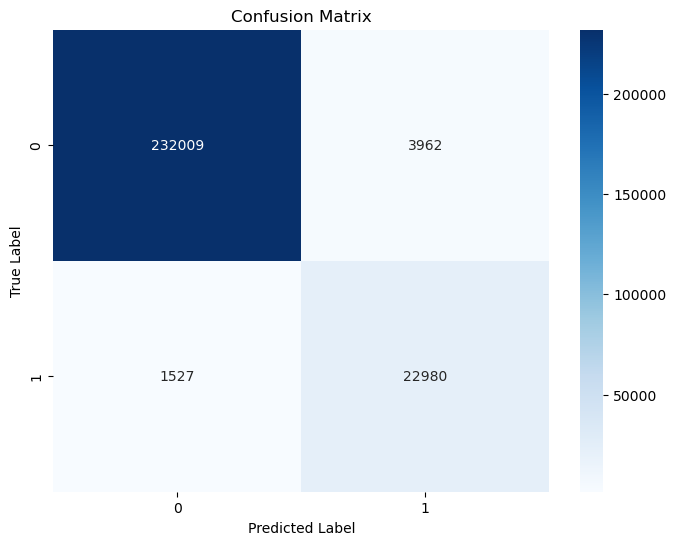

In [15]:
cm = confusion_matrix(y_test_gst, y_pred_gst)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.4 MB 2.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00


In [19]:
import lightgbm as lgb


In [44]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'dart',  # Try dart boosting type
    'num_leaves': 63,  # Example larger value
    'learning_rate': 0.01,  # Small learning rate
    'feature_fraction': 0.9,
    'max_bin': 255,  # Larger bin size
    'num_iterations': 1000  # Large number of iterations
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test_gst, label=y_test_gst, reference=train_data)
num_boost_round = 1000


# Train the model
model_2 = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    
)


C:\Users\aayuk\anaconda3\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 73510, number of negative: 707773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2262
[LightGBM] [Info] Number of data points in the train set: 781283, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094089 -> initscore=-2.264702
[LightGBM] [Info] Start training from score -2.264702


In [52]:
y_pred_prob = model.predict(X_test_gst)
y_pred_gst_2 = (y_pred_prob > 0.5).astype(int)


In [56]:
np.unique(y_pred_gst_2)

array([0, 1])

In [58]:
accuracy_score(y_test_gst,y_pred_gst_2)

0.9789272030651341

In [28]:
!pip install --upgrade lightgbm
